In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

Train, test and validation arrays normalized to:
[1.], [1.0004], [0.9967]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Shape of test set: (3109, 1, 32) 
Shape of train set: (24872, 1, 32) 
Shape of validation set: (3109, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.24, 0.21, 0.2, 0.18, 0.18] 
Fraction of validation labels:  [0.25, 0.19, 0.2, 0.17, 0.19] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32


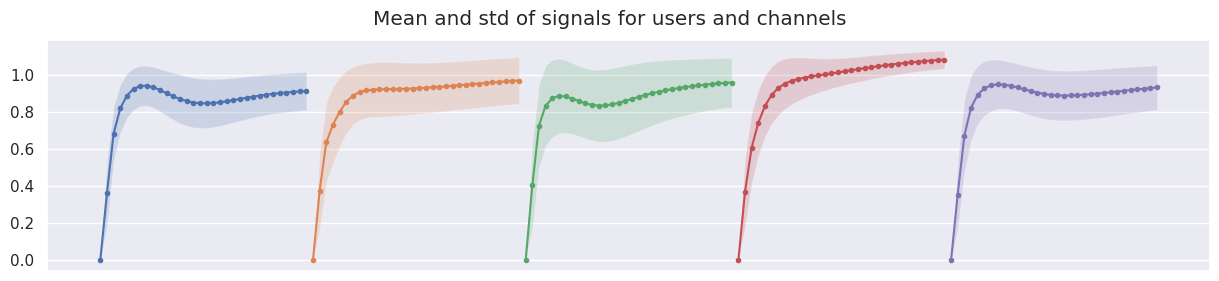

In [2]:
# Standard example 
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import X_CNN
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
# D.balance_train()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1: loss_tr=1.245, loss_val=1.254, train=46.8%, val=46.7%
End of epoch 3: loss_tr=1.040, loss_val=1.043, train=56.4%, val=56.3%
End of epoch 5: loss_tr=0.931, loss_val=0.931, train=62.2%, val=61.9%
End of epoch 7: loss_tr=0.854, loss_val=0.858, train=65.7%, val=65.5%
End of epoch 9: loss_tr=0.802, loss_val=0.813, train=68.2%, val=67.2%
End of epoch 11: loss_tr=0.758, loss_val=0.765, train=70.4%, val=69.9%
End of epoch 13: loss_tr=0.724, loss_val=0.736, train=71.4%, val=70.9%
End of epoch 15: loss_tr=0.728, loss_val=0.746, train=70.8%, val=70.8%
End of epoch 17: loss_tr=0.680, loss_val=0.706, train=73.3%, val=72.5%
End of epoch 19: loss_tr=0.694, loss_val=0.715, train=71.8%, val=71.4%

Training Complete!
Loading best weights for lowest validation loss=0.685 ...

Average running time per epoch: 0.45 seconds
Total running time: 8.47 seconds

Test dataset metrics:
Overall Accuracy = 70.3%, Matthews Corr Coef = 0.63


              precision    recall  f1-score   support

      

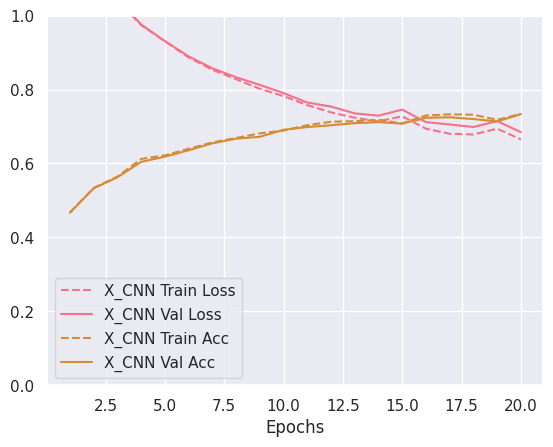

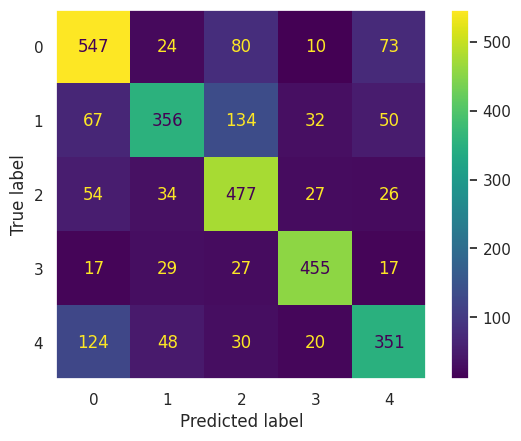

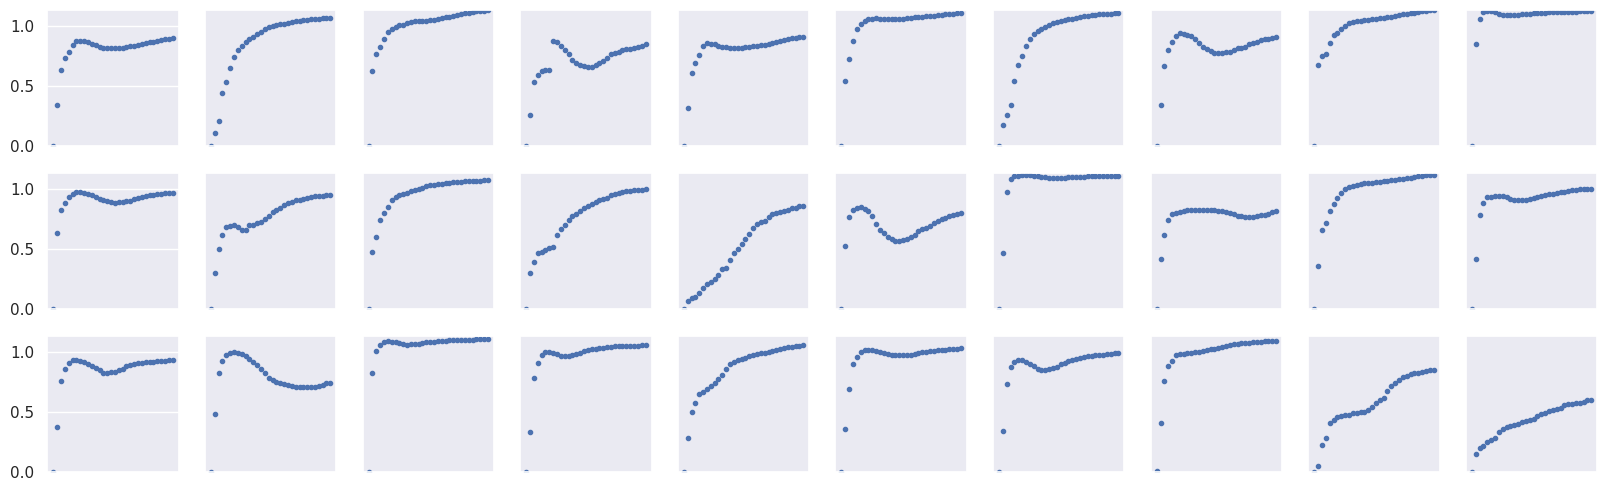

In [3]:
model = X_CNN(input_ch=1, n_filters=8, n_hidden=128, out_size=5)
T = Trainer(D)
T.setup(model, max_epochs=20, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

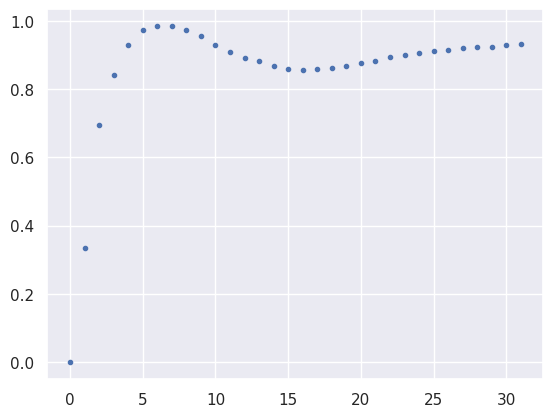

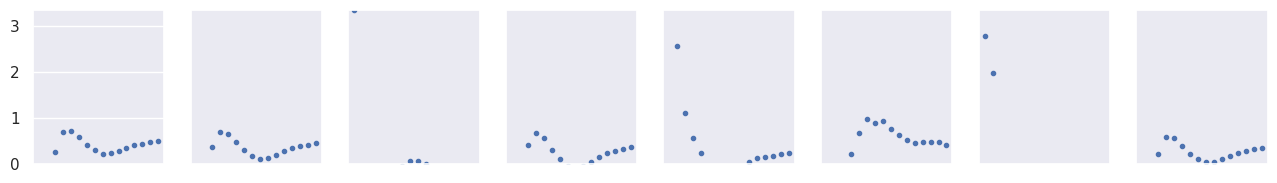

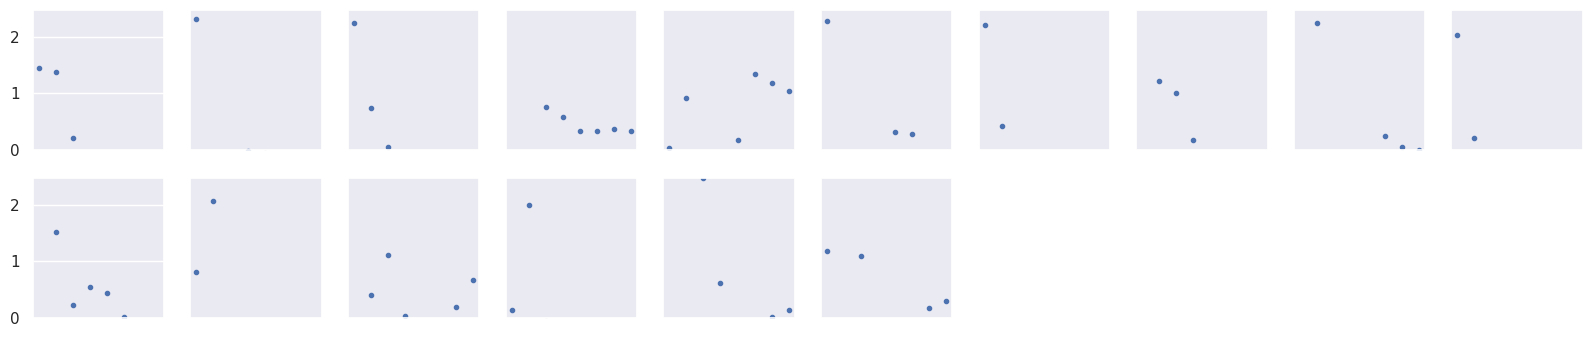

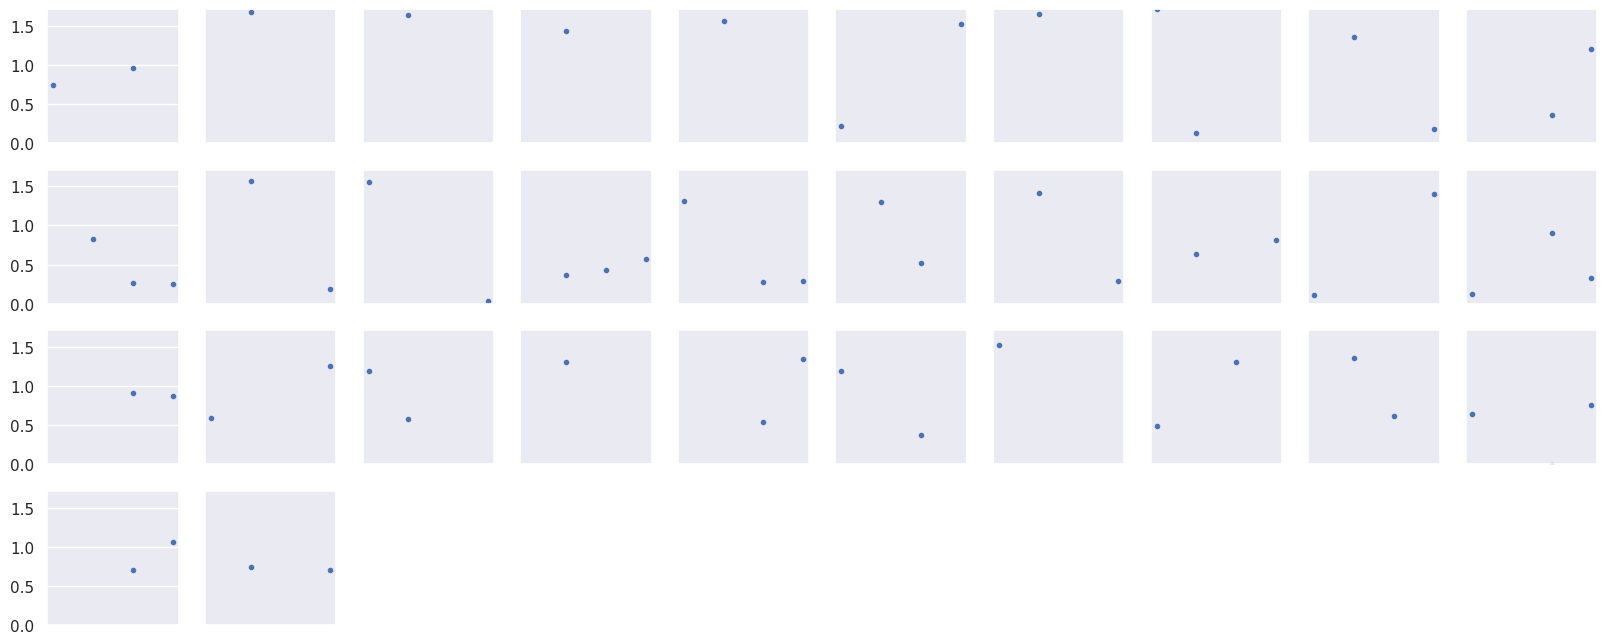

In [15]:
from peratouch.plot import plot_grid, plot_flatten
import matplotlib.pyplot as plt
# Look at first layer
input = D.xte[500:501]
plt.plot(range(len(input.squeeze())), input.squeeze(), 'b.')

out = model.first_layer(input)
plot_grid(out.data.squeeze())
out = model.second_layer(out)
plot_grid(out.data.squeeze())
out = model.third_layer(out)
plot_grid(out.data.squeeze())

In [17]:
# Look at 3 channels
from peratouch.data import Data 
from peratouch.trainer import Trainer  
from peratouch.networks import X_CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation arrays normalized to:
[1. 1. 1.], [1.0001 0.9997 0.9986], [1.0004 1.0008 1.0023]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (3107, 3, 32) 
Shape of train set: (24860, 3, 32) 
Shape of validation set: (3108, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.19, 0.2, 0.18, 0.18] 
Fraction of validation labels:  [0.24, 0.2, 0.2, 0.17, 0.19] 
Fraction of train labels:  [0.24, 0.19, 0.19, 0.18, 0.19] 
dtype of inputs:  torch.float32


End of epoch 1: loss_tr=0.881, loss_val=0.906, train=64.4%, val=62.8%
End of epoch 6: loss_tr=0.482, loss_val=0.565, train=81.0%, val=78.2%
End of epoch 11: loss_tr=0.439, loss_val=0.528, train=83.2%, val=80.7%
End of epoch 16: loss_tr=0.358, loss_val=0.471, train=86.3%, val=82.3%
End of epoch 21: loss_tr=0.319, loss_val=0.431, train=87.8%, val=84.1%
End of epoch 26: loss_tr=0.358, loss_val=0.498, train=86.1%, val=80.9%
End of epoch 31: loss_tr=0.287, loss_val=0.391, train=89.1%, val=85.2%
End of epoch 36: loss_tr=0.319, loss_val=0.435, train=87.7%, val=83.7%
End of epoch 41: loss_tr=0.264, loss_val=0.372, train=89.9%, val=86.0%
End of epoch 46: loss_tr=0.258, loss_val=0.383, train=90.5%, val=85.6%

Training Complete!
Loading best weights for lowest validation loss=0.372 ...

Average running time per epoch: 0.83 seconds
Total running time: 40.89 seconds

Test dataset metrics:
Overall Accuracy = 85.7%, Matthews Corr Coef = 0.82


              precision    recall  f1-score   support

  

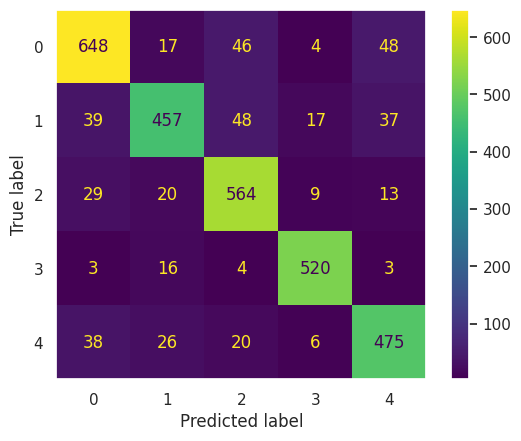

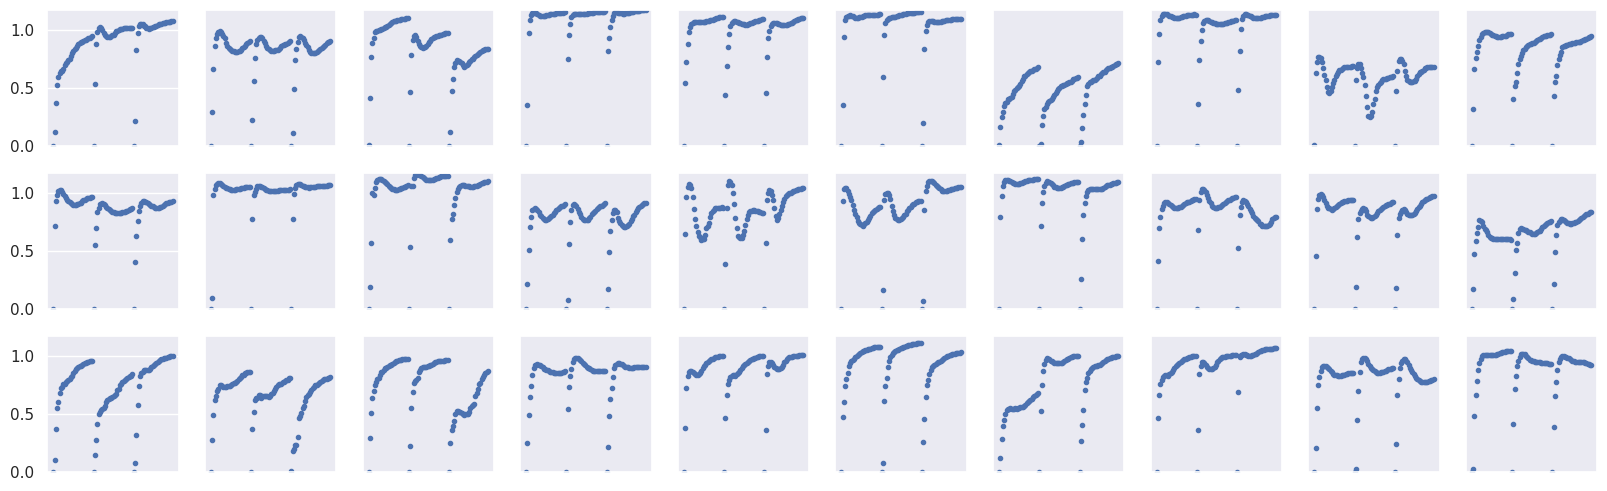

In [19]:
# Did not see any improvement by trying out CNN_Dense
model = X_CNN(input_ch=3, n_filters=16, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=50, batch_size=700)
T.train_model(model)

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

In [ ]:
from peratouch.plot import plot_grid, plot_flatten
import matplotlib.pyplot as plt
# Look at first layer
input = D.xte[500:501]
plot_flatten(input)

out = model.first_layer(input)
plot_grid(out.data.squeeze())
out = model.second_layer(out)
plot_grid(out.data.squeeze())
out = model.third_layer(out)
plot_grid(out.data.squeeze())